# Prosper Loan Data Analysis
## by ABELA NOMO

## Introduction

The 113,937 loans in this ProsperLoan data set have an average of 81 variables, such as loan amount, borrower rate (or interest rate), current loan status, borrower income, and many more. I focused on a small number of variables because the project objective itself instructs me to keep the visualization simple.

## Preliminary Wrangling


In [73]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [74]:
data = pd.read_csv('prosperLoanData.csv')
data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### examination of columns , missing value and data type

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

There are some missing values, but let us concentrate on the variables listed below.
there are many missing values but let's focus on the following columns

In [76]:
cols = ['Term' , 
        'LoanStatus', 
        'EstimatedEffectiveYield' ,  
        'BorrowerAPR' , 
        'BorrowerRate' , 
        'ProsperRating (numeric)',
        'ProsperRating (Alpha)',
        'ProsperScore',                     
        'ListingCategory (numeric)', 
        'EmploymentStatus',
        'Occupation', 
        'EmploymentStatusDuration', 
        'IsBorrowerHomeowner', 
        'IncomeVerifiable', 
        'StatedMonthlyIncome', 
        'MonthlyLoanPayment',
        'Recommendations', 
        'DebtToIncomeRatio',
        'LoanOriginalAmount' ,
        'PercentFunded',
        'IncomeRange',
        'Investors',
        'BorrowerState']

In [77]:
loan_data= data[cols]
loan_data.columns

Index(['Term', 'LoanStatus', 'EstimatedEffectiveYield', 'BorrowerAPR',
       'BorrowerRate', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'EmploymentStatus',
       'Occupation', 'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'IncomeVerifiable', 'StatedMonthlyIncome', 'MonthlyLoanPayment',
       'Recommendations', 'DebtToIncomeRatio', 'LoanOriginalAmount',
       'PercentFunded', 'IncomeRange', 'Investors', 'BorrowerState'],
      dtype='object')

In [78]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 23 columns):
Term                         113937 non-null int64
LoanStatus                   113937 non-null object
EstimatedEffectiveYield      84853 non-null float64
BorrowerAPR                  113912 non-null float64
BorrowerRate                 113937 non-null float64
ProsperRating (numeric)      84853 non-null float64
ProsperRating (Alpha)        84853 non-null object
ProsperScore                 84853 non-null float64
ListingCategory (numeric)    113937 non-null int64
EmploymentStatus             111682 non-null object
Occupation                   110349 non-null object
EmploymentStatusDuration     106312 non-null float64
IsBorrowerHomeowner          113937 non-null bool
IncomeVerifiable             113937 non-null bool
StatedMonthlyIncome          113937 non-null float64
MonthlyLoanPayment           113937 non-null float64
Recommendations              113937 non-null int64
DebtToIn

In [79]:
loan_data.describe()

,Term,EstimatedEffectiveYield,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,StatedMonthlyIncome,MonthlyLoanPayment,Recommendations,DebtToIncomeRatio,LoanOriginalAmount,PercentFunded,Investors
count,113937.000000,84853.000000,113912.000000,113937.000000,84853.000000,84853.000000,113937.000000,106312.000000,1.139370e+05,113937.000000,113937.000000,105383.000000,113937.00000,113937.000000,113937.000000
mean,40.830248,0.168661,0.218828,0.192764,4.072243,5.950067,2.774209,96.071582,5.608026e+03,272.475783,0.048027,0.275947,8337.01385,0.998584,80.475228
std,10.436212,0.068467,0.080364,0.074818,1.673227,2.376501,3.996797,94.480605,7.478497e+03,192.697812,0.332353,0.551759,6245.80058,0.017919,103.239020
min,12.000000,-0.182700,0.006530,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1000.00000,0.700000,1.000000
25%,36.000000,0.115670,0.156290,0.134000,3.000000,4.000000,1.000000,26.000000,3.200333e+03,131.620000,0.000000,0.140000,4000.00000,1.000000,2.000000
50%,36.000000,0.161500,0.209760,0.184000,4.000000,6.000000,1.000000,67.000000,4.666667e+03,217.740000,0.000000,0.220000,6500.00000,1.000000,44.000000
75%,36.000000,0.224300,0.283810,0.250000,5.000000,8.000000,3.000000,137.000000,6.825000e+03,371.580000,0.000000,0.320000,12000.00000,1.000000,115.000000
max,60.000000,0.319900,0.512290,0.497500,7.000000,11.000000,20.000000,755.000000,1.750003e+06,2251.510000,39.000000,10.010000,35000.00000,1.012500,1189.000000


i'm going to delete all null rows because this project is just for visualization

In [80]:
loan_data = loan_data.dropna()
loan_data.describe()

,Term,EstimatedEffectiveYield,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,StatedMonthlyIncome,MonthlyLoanPayment,Recommendations,DebtToIncomeRatio,LoanOriginalAmount,PercentFunded,Investors
count,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000
mean,42.760470,0.166738,0.223901,0.193621,4.132413,6.080246,3.302259,104.578028,6002.833586,296.421859,0.016571,0.258032,9294.999410,0.998131,69.998517
std,11.744005,0.067595,0.079372,0.074088,1.661460,2.360640,4.396670,95.836443,5110.743506,189.674943,0.187732,0.320587,6413.404265,0.020572,97.801415
min,12.000000,-0.181600,0.045830,0.040000,1.000000,1.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,1000.000000,0.700000,1.000000
25%,36.000000,0.114800,0.161570,0.134900,3.000000,4.000000,1.000000,32.000000,3583.333333,159.062500,0.000000,0.150000,4000.000000,1.000000,1.000000
50%,36.000000,0.157670,0.215660,0.184500,4.000000,6.000000,1.000000,76.000000,5041.666667,257.760000,0.000000,0.220000,8000.000000,1.000000,32.000000
75%,60.000000,0.219000,0.287800,0.254900,5.000000,8.000000,3.000000,150.000000,7250.000000,392.420000,0.000000,0.320000,14603.250000,1.000000,100.000000
max,60.000000,0.319900,0.423950,0.360000,7.000000,11.000000,20.000000,755.000000,483333.333333,2251.510000,19.000000,10.010000,35000.000000,1.012500,1189.000000


In [81]:
loan_data.Term.unique()

array([36, 60, 12])

we have to convert columns 'Term' in category

In [82]:
loan_data['Term'] = loan_data['Term'].astype('category')

In [83]:
loan_data.rename(columns={'ProsperRating (Alpha)': 'ProsperRating_Alpha', 
                        'ProsperRating (numeric)': 'ProsperRating_Numeric',
                        'ListingCategory (numeric)' : 'ListingCategory_Numeric'
                       }, inplace=True)

Identify the types of variables

In [84]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76216 entries, 1 to 113936
Data columns (total 23 columns):
Term                        76216 non-null category
LoanStatus                  76216 non-null object
EstimatedEffectiveYield     76216 non-null float64
BorrowerAPR                 76216 non-null float64
BorrowerRate                76216 non-null float64
ProsperRating_Numeric       76216 non-null float64
ProsperRating_Alpha         76216 non-null object
ProsperScore                76216 non-null float64
ListingCategory_Numeric     76216 non-null int64
EmploymentStatus            76216 non-null object
Occupation                  76216 non-null object
EmploymentStatusDuration    76216 non-null float64
IsBorrowerHomeowner         76216 non-null bool
IncomeVerifiable            76216 non-null bool
StatedMonthlyIncome         76216 non-null float64
MonthlyLoanPayment          76216 non-null float64
Recommendations             76216 non-null int64
DebtToIncomeRatio           76216 no

In [85]:
#Categorical attributes
categoric_loan_data = loan_data.loc[:, (loan_data.dtypes == 'object') | (loan_data.dtypes == 'category')]
categoric_loan_data.columns

Index(['Term', 'LoanStatus', 'ProsperRating_Alpha', 'EmploymentStatus',
       'Occupation', 'IncomeRange', 'BorrowerState'],
      dtype='object')

In [86]:
#Numeric attributes
num_loan_data = loan_data.loc[:, (loan_data.dtypes == np.float64) | (loan_data.dtypes == np.int64)]
num_loan_data.columns

Index(['EstimatedEffectiveYield', 'BorrowerAPR', 'BorrowerRate',
       'ProsperRating_Numeric', 'ProsperScore', 'ListingCategory_Numeric',
       'EmploymentStatusDuration', 'StatedMonthlyIncome', 'MonthlyLoanPayment',
       'Recommendations', 'DebtToIncomeRatio', 'LoanOriginalAmount',
       'PercentFunded', 'Investors'],
      dtype='object')

### What is the structure of your dataset?

This data set includes 113,937 loans, each with 81 variables such as loan amount, borrower rate (or interest rate), current loan status, borrower income, and many more.

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in determining which features in the dataset are best for predicting the Loan outcome.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

 anticipate that loan status will have a significant impact on the borrower's background, such as occupation, income, home ownership status, and prosper rating.

## Univariate Exploration

### Numeric variable
The variables that are numeric are 'Term', 'EstimatedEffectiveYield', 'BorrowerAPR', 'BorrowerRate', 'ProsperRating_Numeric', 'ProsperScore', 'ListingCategory_Numeric', 'EmploymentStatusDuration', 'StatedMonthlyIncome', 'MonthlyLoanPayment', 'Recommendations', 'DebtToIncomeRatio', 'LoanOriginalAmount', 'PercentFunded', 'Investors'

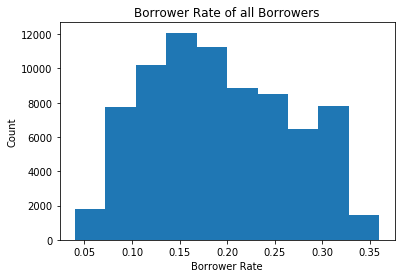

In [87]:
plt.hist(data = loan_data, x = 'BorrowerRate');
plt.xlabel('Borrower Rate');
plt.ylabel('Count');
plt.title("Borrower Rate of all Borrowers");

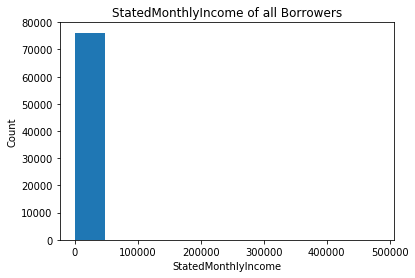

In [88]:
plt.hist(data = loan_data, x = 'StatedMonthlyIncome');
plt.xlabel('StatedMonthlyIncome');
plt.ylabel('Count');
plt.title("StatedMonthlyIncome of all Borrowers");

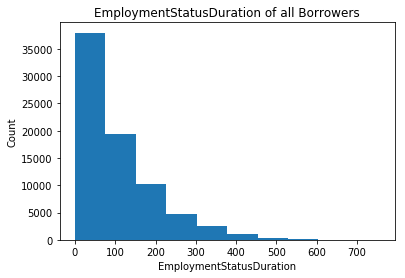

In [89]:
plt.hist(data = loan_data, x = 'EmploymentStatusDuration');
plt.xlabel('EmploymentStatusDuration');
plt.ylabel('Count');
plt.title("EmploymentStatusDuration of all Borrowers");

In [90]:
(loan_data['StatedMonthlyIncome'].describe())

count     76216.000000
mean       6002.833586
std        5110.743506
min           0.250000
25%        3583.333333
50%        5041.666667
75%        7250.000000
max      483333.333333
Name: StatedMonthlyIncome, dtype: float64

In [91]:
np.log10(loan_data['StatedMonthlyIncome'].describe())

count    4.882046
mean     3.778356
std      3.708484
min     -0.602060
25%      3.554287
50%      3.702574
75%      3.860338
max      5.684247
Name: StatedMonthlyIncome, dtype: float64

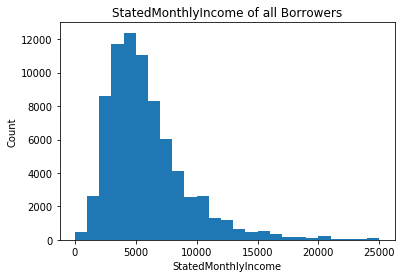

In [92]:
loan_data_sub = loan_data[loan_data['StatedMonthlyIncome'] <= 25000]
bin_edges = np.arange(0, loan_data_sub['StatedMonthlyIncome'].max()+1000, 1000)
plt.hist(data = loan_data, x = 'StatedMonthlyIncome', bins = bin_edges);
plt.xlabel('StatedMonthlyIncome');
plt.ylabel('Count');
plt.title("StatedMonthlyIncome of all Borrowers");

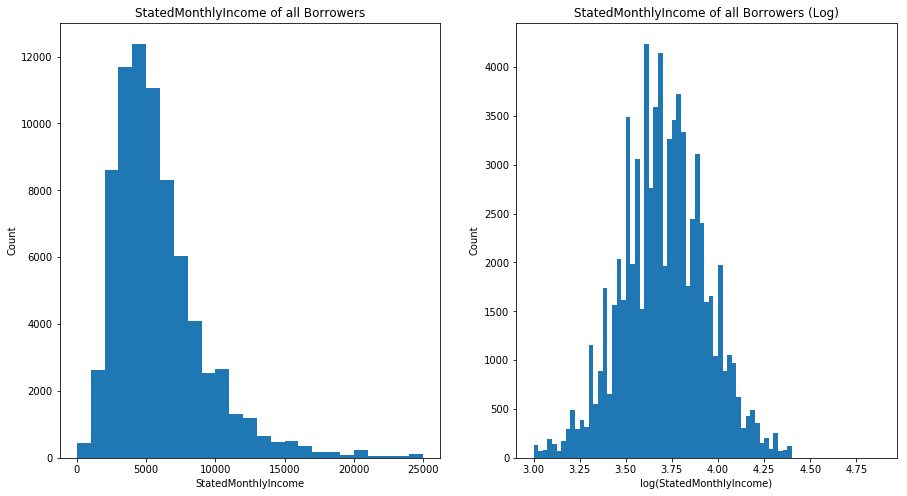

In [93]:
plt.figure(figsize = [15, 8])

# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, loan_data_sub['StatedMonthlyIncome'].max()+1000, 1000)
plt.hist(data =loan_data_sub, x = 'StatedMonthlyIncome', bins = bin_edges)
plt.xlabel('StatedMonthlyIncome')
plt.ylabel('Count');
plt.title("StatedMonthlyIncome of all Borrowers");

# right histogram: data plotted after direct log transformation
plt.subplot(1, 2, 2)
log_data = np.log10(loan_data_sub['StatedMonthlyIncome']) # direct data transform
log_bin_edges = np.arange(3, log_data.max()+0.5, 0.025)
plt.hist(log_data, bins = log_bin_edges)
plt.xlabel('log(StatedMonthlyIncome)');
plt.ylabel('Count');
plt.title("StatedMonthlyIncome of all Borrowers (Log)");



# Without log transformation looks good on StatedMonthlyIncome

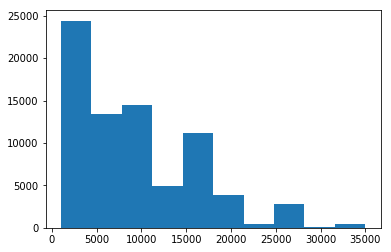

In [94]:
plt.hist(data = loan_data, x = 'LoanOriginalAmount');

In [95]:
(loan_data['LoanOriginalAmount'].describe())

count    76216.000000
mean      9294.999410
std       6413.404265
min       1000.000000
25%       4000.000000
50%       8000.000000
75%      14603.250000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64

In [96]:
np.log10(loan_data['LoanOriginalAmount'].describe())

count    4.882046
mean     3.968249
std      3.807089
min      3.000000
25%      3.602060
50%      3.903090
75%      4.164450
max      4.544068
Name: LoanOriginalAmount, dtype: float64

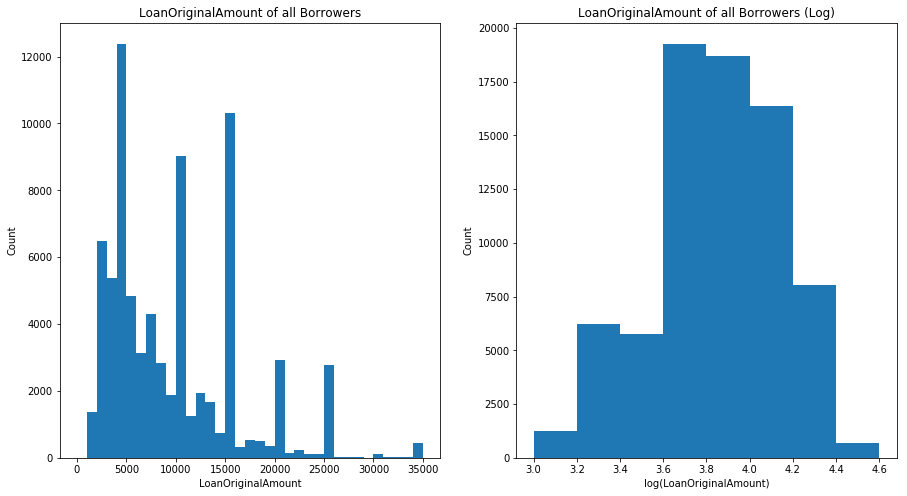

In [97]:
plt.figure(figsize = [15, 8])

# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, loan_data['LoanOriginalAmount'].max()+1000, 1000)
plt.hist(data =loan_data, x = 'LoanOriginalAmount', bins = bin_edges)
plt.xlabel('LoanOriginalAmount')
plt.ylabel('Count');
plt.title("LoanOriginalAmount of all Borrowers");

# right histogram: data plotted after direct log transformation
plt.subplot(1, 2, 2)
log_data = np.log10(loan_data['LoanOriginalAmount']) # direct data transform
log_bin_edges = np.arange(3.0, log_data.max()+0.1, 0.2)
plt.hist(log_data, bins = log_bin_edges)
plt.xlabel('log(LoanOriginalAmount)');
plt.ylabel('Count');
plt.title("LoanOriginalAmount of all Borrowers (Log)");

loan_data['LoanOriginalAmount_log'] = np.log10(loan_data['LoanOriginalAmount'])

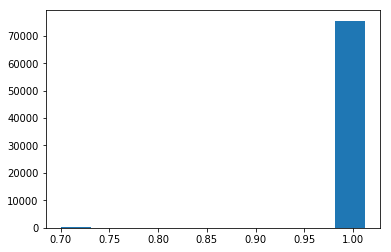

In [98]:
plt.hist(data = loan_data, x = 'PercentFunded');

In [99]:
loan_data['Investors'].min(), loan_data['Investors'].max(),

(1, 1189)

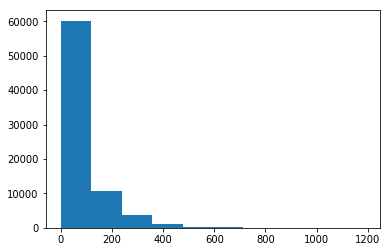

In [100]:
plt.hist(data = loan_data, x = 'Investors');

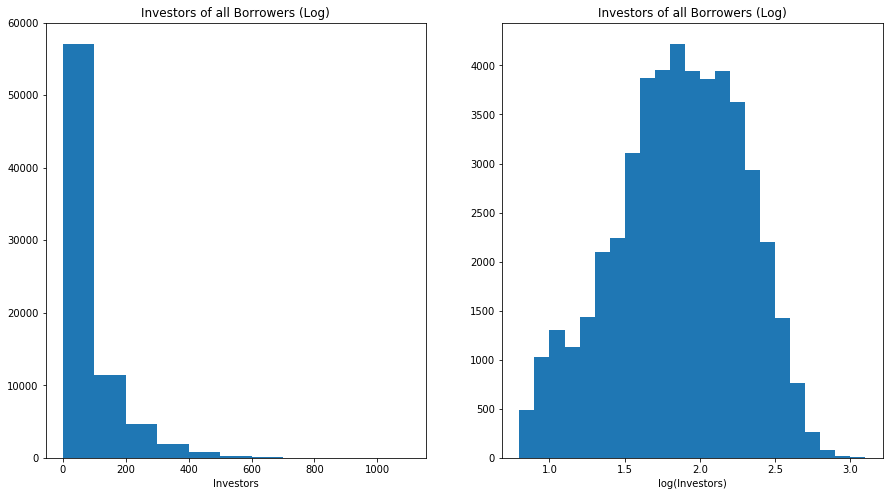

In [101]:
plt.figure(figsize = [15, 8])

# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, loan_data['Investors'].max()+10, 100)
plt.hist(data =loan_data, x = 'Investors', bins = bin_edges)
plt.xlabel('Investors')
plt.title("Investors of all Borrowers (Log)");

# right histogram: data plotted after direct log transformation
plt.subplot(1, 2, 2)
log_data = np.log10(loan_data['Investors']) # direct data transform
log_bin_edges = np.arange(0.8, log_data.max()+0.1, 0.1)
plt.hist(log_data, bins = log_bin_edges)
plt.xlabel('log(Investors)')
plt.title("Investors of all Borrowers (Log)");

loan_data['Investors_log'] = np.log10(loan_data['Investors'])

#### Insights with Numerical variables analysis
BorrowerRate : The Borrower's interest rate for this loan. The borrowers rate follow an approximately unimodal distribution, with the peak around 0.16. There seems to be a spike that occurs around 0.32.

StatedMonthlyIncome : The monthly income the borrower stated at the time the listing was created. Monthly Income will definitely be right skewed since very few people will be having a higher salary. So I cut the outliers and made the data to look at log 10 scales. Majority of the borrowers are having a salary with less than 10000 USD and the peak is observed at 5000 USD

LoanOriginalAmount: The origination amount of the loan.Now this is interesting. Here we see that the distribution is a right skewed with multiple peaks observed at 4000 USD, 10000 USD and 15000 USD.

Investors: Majority of the investors are between 0 and 100

### Categorical attributes

In [102]:
loan_data.columns

Index(['Term', 'LoanStatus', 'EstimatedEffectiveYield', 'BorrowerAPR',
       'BorrowerRate', 'ProsperRating_Numeric', 'ProsperRating_Alpha',
       'ProsperScore', 'ListingCategory_Numeric', 'EmploymentStatus',
       'Occupation', 'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'IncomeVerifiable', 'StatedMonthlyIncome', 'MonthlyLoanPayment',
       'Recommendations', 'DebtToIncomeRatio', 'LoanOriginalAmount',
       'PercentFunded', 'IncomeRange', 'Investors', 'BorrowerState',
       'LoanOriginalAmount_log', 'Investors_log'],
      dtype='object')

In [103]:
loan_data['IsBorrowerHomeowner'].value_counts()

True     41454
False    34762
Name: IsBorrowerHomeowner, dtype: int64

In [104]:
loan_data['ProsperRating_Alpha'].value_counts()

C     16499
B     14379
A     13490
D     12629
E      8443
HR     5680
AA     5096
Name: ProsperRating_Alpha, dtype: int64

In [105]:
loan_data['IncomeRange'].value_counts()

$50,000-74,999    23692
$25,000-49,999    21421
$100,000+         13977
$75,000-99,999    13547
$1-24,999          3578
Not employed          1
Name: IncomeRange, dtype: int64

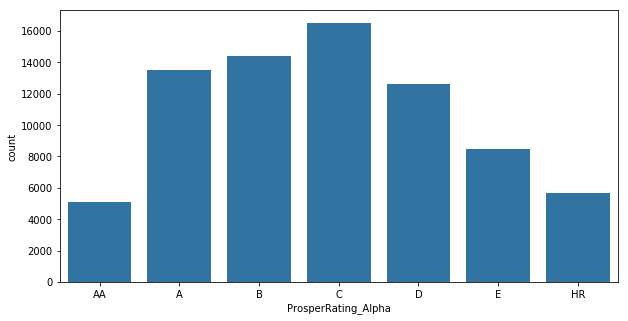

In [106]:
# From above it seems the order has to be maintained becuase this is an ordinal variable
plt.figure(figsize = [10, 5]) 
ProsperRating_Alpha_classes = ['AA','A', 'B', 'C', 'D', 'E', 'HR']
IncomeRange_classes = ['$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = ProsperRating_Alpha_classes)
    loan_data['ProsperRating_Alpha'] = loan_data['ProsperRating_Alpha'].astype(vclasses)
    vclasses_1 = pd.api.types.CategoricalDtype(ordered = True, categories = IncomeRange_classes)
    loan_data['IncomeRange'] = loan_data['IncomeRange'].astype(vclasses_1)
else: # compatibility for v.20
    loan_data['ProsperRating_Alpha'] = loan_data['ProsperRating_Alpha'].astype('category', ordered = True,
                                                     categories = ProsperRating_Alpha_classes)
    loan_data['IncomeRange'] = loan_data['IncomeRange'].astype('category', ordered = True,
                                                     categories = IncomeRange_classes)

plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
sb.countplot(data = loan_data, x = 'ProsperRating_Alpha', color = base_color);

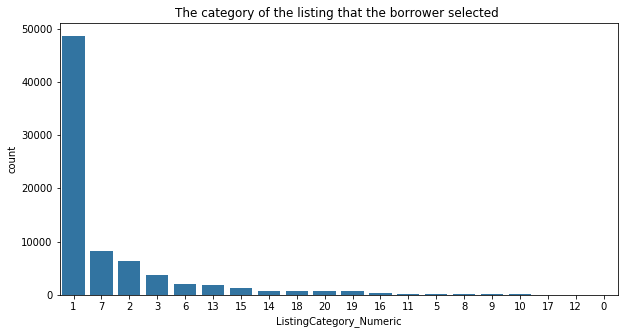

In [107]:
# ListingCategory_Numeric
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
plt.title("The category of the listing that the borrower selected ")
sb.countplot(data = loan_data, x = 'ListingCategory_Numeric', color = base_color,
             order = loan_data['ListingCategory_Numeric'].value_counts().index );


In [108]:
loan_data['LoanStatus'].value_counts()

Current                   51170
Completed                 17687
Chargedoff                 4444
Defaulted                   885
Past Due (1-15 days)        714
Past Due (31-60 days)       322
Past Due (91-120 days)      277
Past Due (61-90 days)       275
Past Due (16-30 days)       241
FinalPaymentInProgress      187
Past Due (>120 days)         14
Name: LoanStatus, dtype: int64

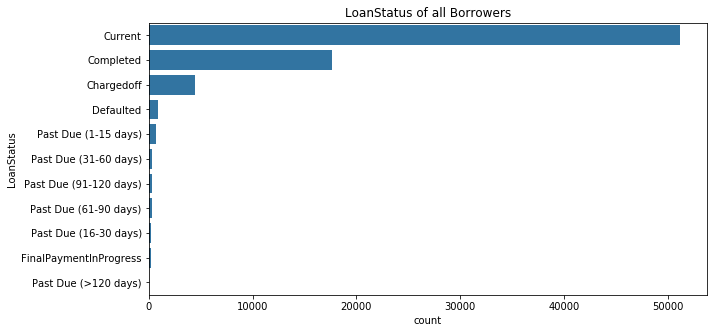

In [109]:
#'LoanStatus'
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
plt.title("LoanStatus of all Borrowers")
sb.countplot(data = loan_data, y = 'LoanStatus', color = base_color,
             order = loan_data['LoanStatus'].value_counts().index);

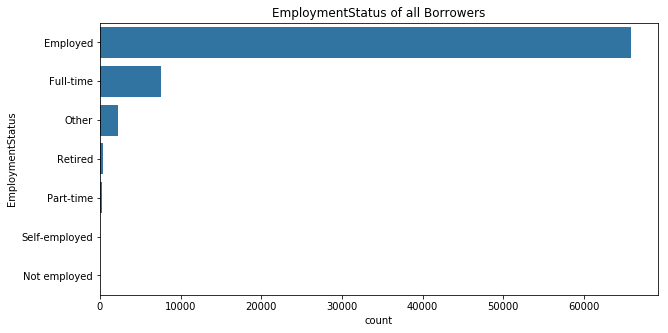

In [110]:
# 'EmploymentStatus'
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
plt.title("EmploymentStatus of all Borrowers")
sb.countplot(data = loan_data, y = 'EmploymentStatus', color = base_color,
             order = loan_data['EmploymentStatus'].value_counts().index);

In [111]:
loan_data['IncomeRange'].value_counts()

$50,000-74,999    23692
$25,000-49,999    21421
$100,000+         13977
$75,000-99,999    13547
$1-24,999          3578
Name: IncomeRange, dtype: int64

In [112]:
loan_data_1 = loan_data[loan_data['IncomeRange'] != 'Not employed']

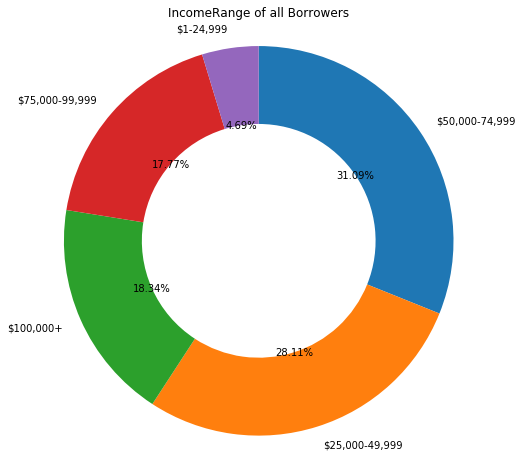

In [113]:
plt.figure(figsize = [15, 8])
sorted_counts = loan_data_1['IncomeRange'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4}, autopct   = '%.2f%%');
plt.title("IncomeRange of all Borrowers")
plt.axis('square');

In [114]:
loan_data['BorrowerState'].value_counts().head(10)

CA    9574
NY    5184
TX    5086
FL    4738
IL    3871
OH    3061
GA    3006
VA    2530
NJ    2463
PA    2416
Name: BorrowerState, dtype: int64

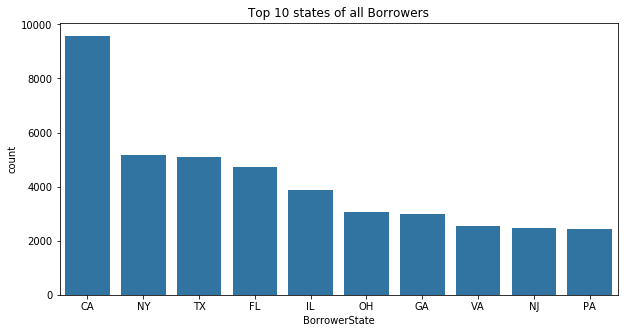

In [115]:
# BorrowerState
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
sb.countplot(data = loan_data, x = 'BorrowerState', color = base_color,
             order = loan_data['BorrowerState'].value_counts().head(10).index );
plt.title("Top 10 states of all Borrowers");

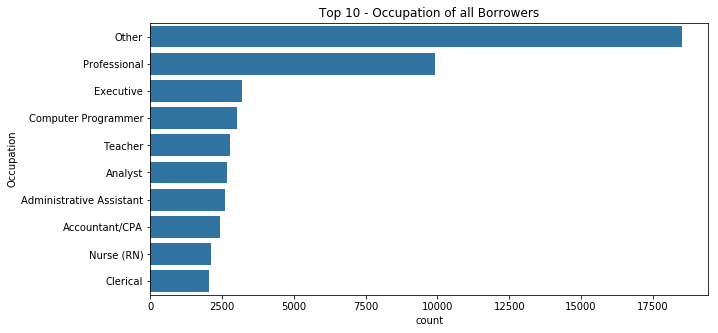

In [116]:
#'Occupation'
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
sb.countplot(data = loan_data, y = 'Occupation', color = base_color,
             order = loan_data['Occupation'].value_counts().head(10).index );
plt.title("Top 10 - Occupation of all Borrowers");

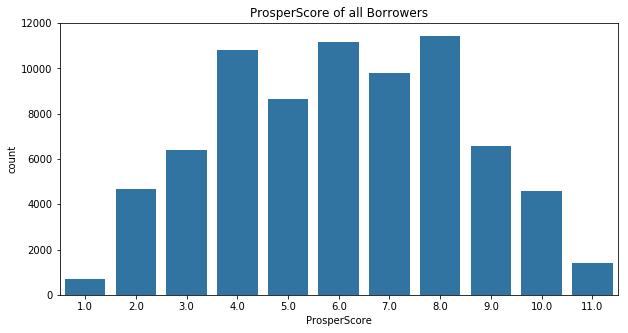

In [117]:
#'Occupation'
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
sb.countplot(data = loan_data, x = 'ProsperScore', color = base_color);
plt.title("ProsperScore of all Borrowers");

#### Insights with categorical variables analysis
Top IncomeRange of all Borrowers are within $50,000-74,999

Top 2 states of all Borrowers are from CA and NY

Majority of the borrowers are with an occupation of Professional and Executive

Loans with "AA" category are with lesser count

The top 2 loan consideration reasons are 1 - Debt Consolidation, 2 - Home Improvement

LoanStatus of all Borrowers are with current and completed state

EmploymentStatus of all Borrowers are with Employed State

## Bivariate Exploration
#### Relationship between two numeric variables

In [118]:
loan_data.dtypes

Term                        category
LoanStatus                    object
EstimatedEffectiveYield      float64
BorrowerAPR                  float64
BorrowerRate                 float64
ProsperRating_Numeric        float64
ProsperRating_Alpha         category
ProsperScore                 float64
ListingCategory_Numeric        int64
EmploymentStatus              object
Occupation                    object
EmploymentStatusDuration     float64
IsBorrowerHomeowner             bool
IncomeVerifiable                bool
StatedMonthlyIncome          float64
MonthlyLoanPayment           float64
Recommendations                int64
DebtToIncomeRatio            float64
LoanOriginalAmount             int64
PercentFunded                float64
IncomeRange                 category
Investors                      int64
BorrowerState                 object
LoanOriginalAmount_log       float64
Investors_log                float64
dtype: object

In [119]:
numeric_vars = ['EstimatedEffectiveYield', 'BorrowerAPR', 'BorrowerRate',
                'ProsperRating_Numeric', 'ProsperScore', 
                'ListingCategory_Numeric','EmploymentStatusDuration', 
                'StatedMonthlyIncome', 'MonthlyLoanPayment',
                'Recommendations', 'DebtToIncomeRatio', 'LoanOriginalAmount','PercentFunded', 'Investors', 'LoanOriginalAmount_log',
                 'Investors_log']

numeric_vars_1 = ['BorrowerRate',
                 'ProsperScore',                 
                'StatedMonthlyIncome', 'MonthlyLoanPayment',
                'LoanOriginalAmount', 'Investors' ,'LoanOriginalAmount_log',
                 'Investors_log']

categoric_vars = ['LoanStatus', 'ProsperRating_Alpha', 'EmploymentStatus', 'Occupation',
       'IncomeRange', 'BorrowerState', 'Term', 'IsBorrowerHomeowner']

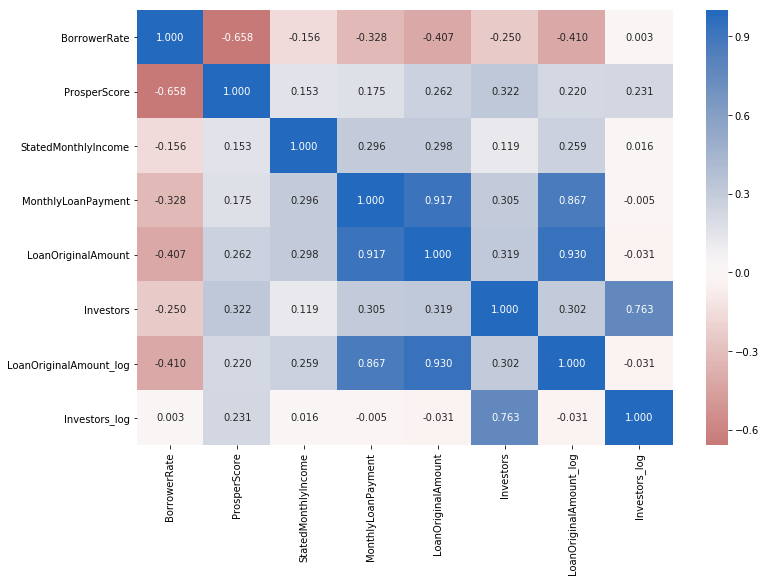

In [120]:
# correlation plot
plt.figure(figsize = [12, 8])
sb.heatmap(loan_data[numeric_vars_1].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

#### Relationship between numeric & categorical variables

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


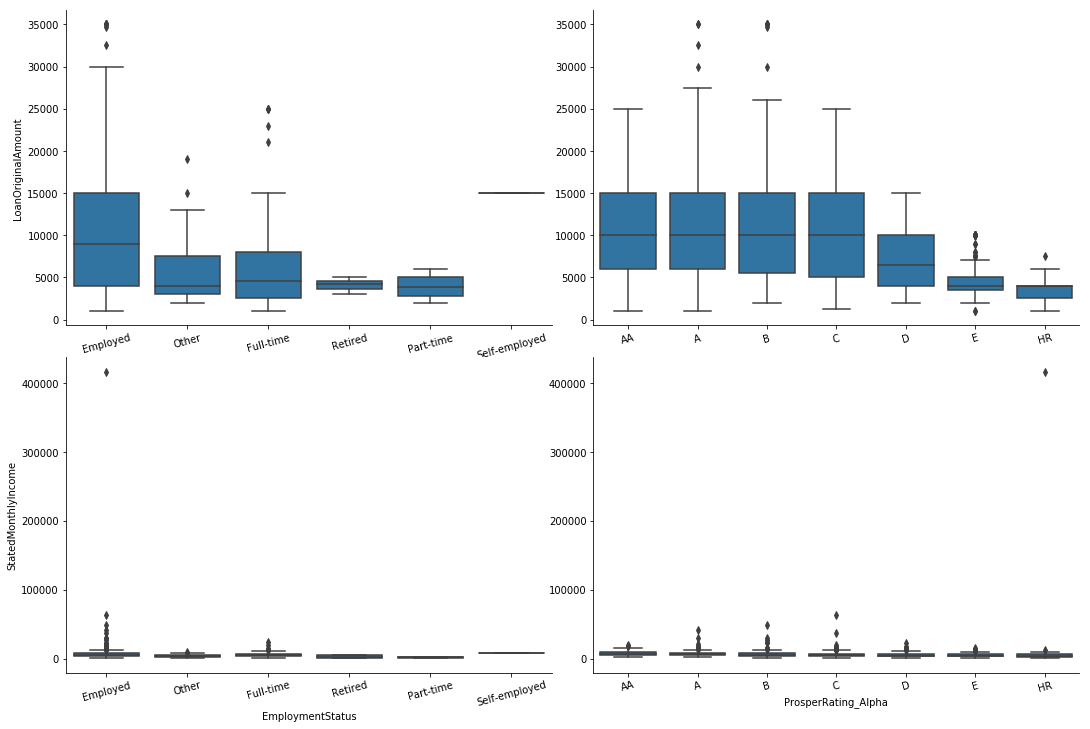

In [121]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.
categoric_vars_1 = ['EmploymentStatus', 'ProsperRating_Alpha']
samples = np.random.choice(loan_data.shape[0], 2000, replace = False)
loan_data_samp = loan_data.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """

    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)
    plt.xticks(rotation = 15)
    

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = loan_data_samp, y_vars = [ 'LoanOriginalAmount', 'StatedMonthlyIncome'], 
                x_vars = categoric_vars_1, size = 5, aspect = 1.5)

g.map(boxgrid);
plt.xticks(rotation = 15)
plt.show();

Text(0.5,1,'Income Range vs Loan Amount')

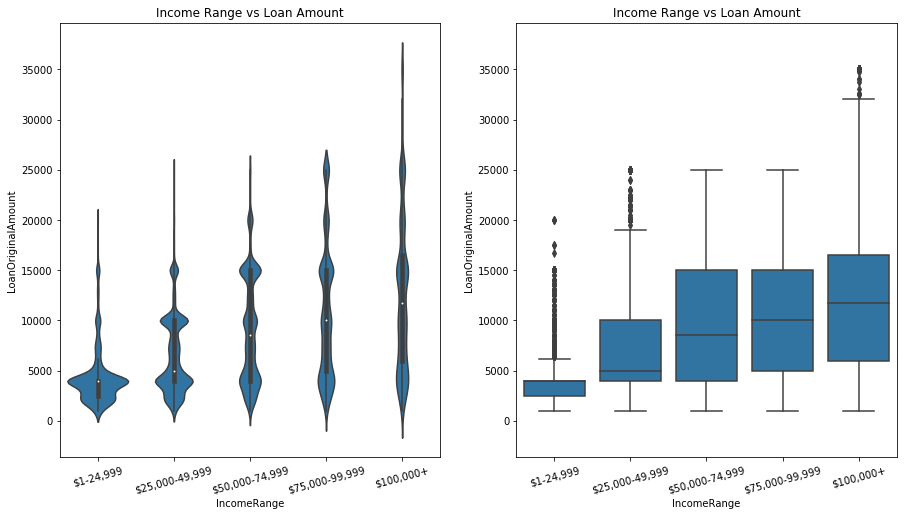

In [122]:
loan_data_sub = loan_data[(loan_data['StatedMonthlyIncome'] <= 10000) ]
loan_data_sub = loan_data_sub[loan_data_sub['IncomeRange'] != 'Not employed']


plt.figure(figsize = [15, 8])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = loan_data_sub, x = 'IncomeRange', y = 'LoanOriginalAmount', color = base_color)
plt.xticks(rotation = 15);
plt.title('Income Range vs Loan Amount')

# right plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = loan_data_sub, x = 'IncomeRange', y = 'LoanOriginalAmount', color = base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
plt.xticks(rotation = 15);
plt.title('Income Range vs Loan Amount')

#### Categorical variables

Text(0.5,1,'Count of Applicants w.r.t LoanStatus and HomeownerStatus')

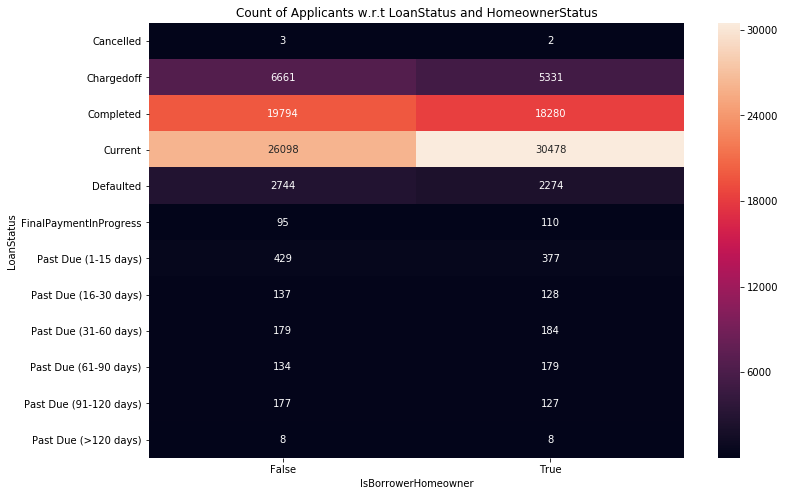

In [123]:
plt.figure(figsize = [12, 8])
ct_counts = data.groupby(['IsBorrowerHomeowner', 'LoanStatus']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'LoanStatus', columns = 'IsBorrowerHomeowner', values = 'count')
sb.heatmap(ct_counts, annot = True, fmt = 'd');
plt.title('Count of Applicants w.r.t LoanStatus and HomeownerStatus')

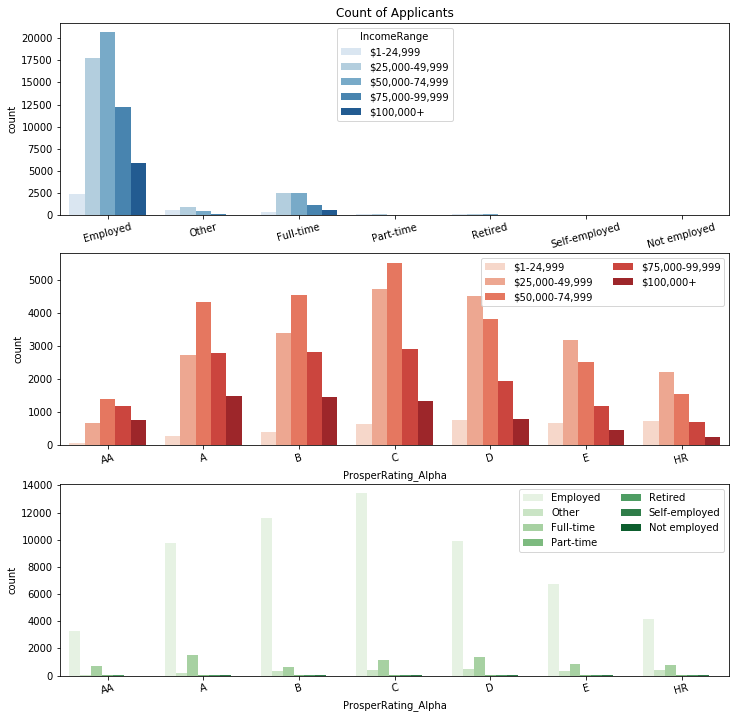

In [124]:
# since there's only three subplots to create, using the full data should be fine.
categoric_vars = ['EmploymentStatus', 'ProsperRating_Alpha', 'IncomeRange']

plt.figure(figsize = [12, 12])

# subplot 1: color vs cut
plt.subplot(3, 1, 1)
sb.countplot(data = loan_data_sub, x = 'EmploymentStatus', hue = 'IncomeRange', palette = 'Blues')
plt.xticks(rotation = 15)
plt.title('Count of Applicants')

# subplot 2: clarity vs. cut
ax = plt.subplot(3, 1, 2)
sb.countplot(data = loan_data_sub, x = 'ProsperRating_Alpha', hue = 'IncomeRange', palette = 'Reds')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping
plt.xticks(rotation = 15)


# subplot 3: clarity vs. color, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = loan_data_sub, x = 'ProsperRating_Alpha', hue = 'EmploymentStatus', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
plt.xticks(rotation = 15)


plt.show()

#### Insights about the entire Bivariate analysis
Loan original amount and monthly loan payment is highly correlated and it is expected and borrowers interest rate and proper score are highly correlated(-vely), Borrower interest rate and loanamount are -vely correlated.

Majority of the borrowers with highest loan amount are taken by Employed, this is followed by others and fulltime employees

The range of the salaries stated is higher for employed borrowers.

LoanOriginalAmount is highest for A and B Prosper ratings, when compared with income range - it is following a normal or expected trend that more salary borrowers are having higher loanoriginalamount

LoanStatus with current and completed have own homes when they applied for loans

Majority of the loan applicants are from 50K to 75K range with emloyeed status

Applicants with incomerange of 50K to 75K range have their prosper rating falling under AA, A, B and C

## Multivariate Exploration


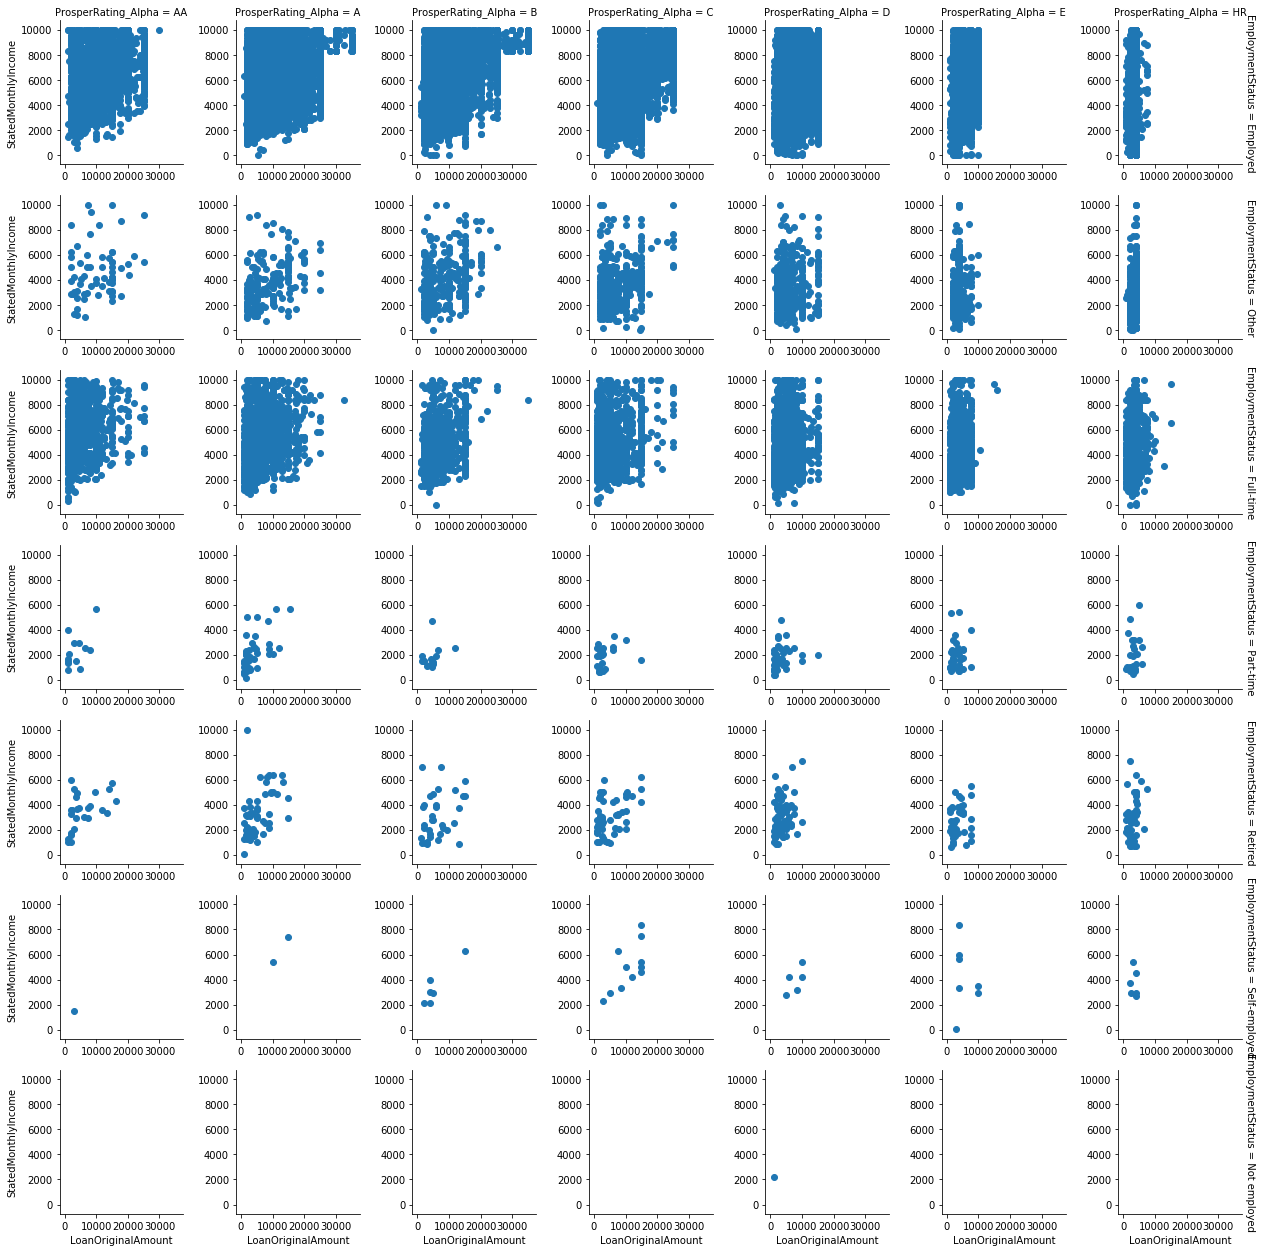

In [125]:
g = sb.FacetGrid(data = loan_data_sub, col = 'ProsperRating_Alpha', row = 'EmploymentStatus', size = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'LoanOriginalAmount', 'StatedMonthlyIncome');

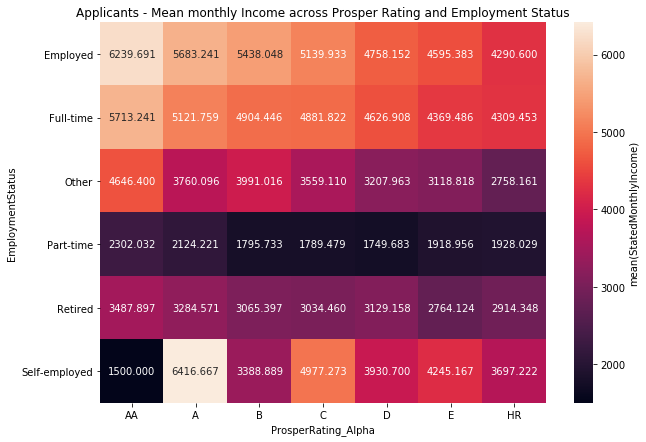

In [126]:
plt.figure(figsize = [10, 7])
loan_data_sub = loan_data_sub[loan_data_sub['EmploymentStatus'] != 'Not employed']

cat_means = loan_data_sub.groupby(['ProsperRating_Alpha', 'EmploymentStatus']).mean()['StatedMonthlyIncome']
cat_means = cat_means.reset_index(name = 'StatedMonthlyIncome_avg')
cat_means = cat_means.pivot(index = 'EmploymentStatus', columns = 'ProsperRating_Alpha',
                            values = 'StatedMonthlyIncome_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(StatedMonthlyIncome)'});
plt.title('Applicants - Mean monthly Income across Prosper Rating and Employment Status');

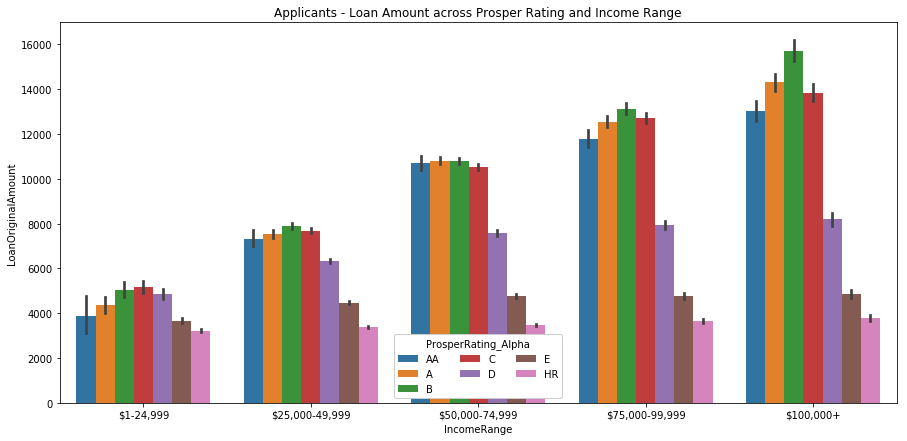

In [127]:
plt.figure(figsize = [15, 7])

ax = sb.barplot(data = loan_data_sub, x = 'IncomeRange', y = 'LoanOriginalAmount', hue = 'ProsperRating_Alpha')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'ProsperRating_Alpha')
plt.title('Applicants - Loan Amount across Prosper Rating and Income Range');

Rating depend on the monhtly income and Employment status?

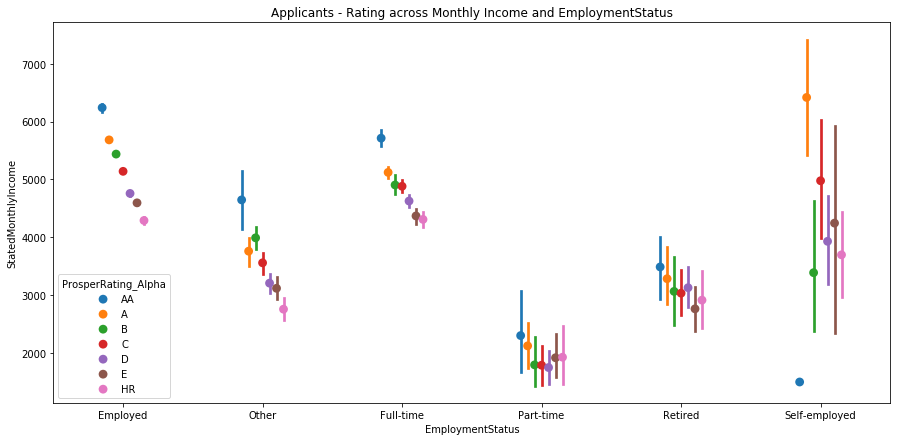

In [128]:
plt.figure(figsize = [15, 7])
ax = sb.pointplot(data = loan_data_sub, x = 'EmploymentStatus', y = 'StatedMonthlyIncome', hue = 'ProsperRating_Alpha',
                  dodge = 0.3, linestyles = "")
plt.title('Applicants - Rating across Monthly Income and EmploymentStatus');

Did homeowner status has impacted the ProsperRating and Borrower Interest Rate?

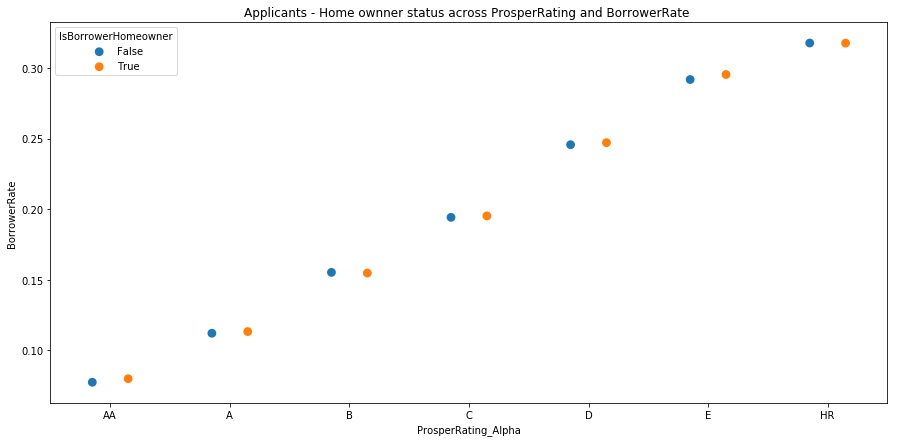

In [129]:
plt.figure(figsize = [15, 7])
ax = sb.pointplot(data = loan_data_sub, x = 'ProsperRating_Alpha', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner',
                  dodge = 0.3, linestyles = "");
plt.title('Applicants - Home ownner status across ProsperRating and BorrowerRate ');

#### Insights from the multivariate exploration data
For Applicants with prosper ratings from AA to D have the higher loan amount with increased salary

Employed and full time employees have their mean salaries in higher range

Majority of the borrowers are falling under prosper rating of B , irrespective of the income range

The monthly income of borrowers are having higher values for employed, other and full time employment status with the prosper rating of AA, A and B

We observe that without homeowner tend to have a higher interest rate, and thus lower rating.However homeowner tends to have lower interest rate and higher rating. So we can safely say that homeowner is safest bet when gving a loan. We can also clearly observe that HR prosper rating applicants have higher interest rates

To conclude this analysis , I say that the loan approval status is heavily dependent on the applicant's information on IncomeRange, Homeownerstatus and employment status.